In [1]:
import sys
sys.path.append('..')
import warnings
warnings.filterwarnings('ignore')
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from dicomhd import io as dhd_io
from medpy.io import load as load_lbl
from tfvpc.utils.vis import show_values_on_bars
from tfvpc.preprocessing.two_dim import load_dataset
from tfvpc.preprocessing.two_dim import count_tfrecord_examples
%matplotlib inline


2021-08-31 16:16:31.720244: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
out_path = '../data/tfrecods/'
# patch size: [n_rows, n_cols, n_planes]
n_rows = 32
n_cols = 32
n_classes = 6
n_channel = 1
epoch = 100
batch_size = 128

### 6-class

In [3]:
out_train_fname = 'train-2D-6cls-10'
out_train_ffname = os.path.join(out_path, out_train_fname + '.tfrecords')

train_dataset = load_dataset(out_train_ffname)
print(f'nm of training samples: {count_tfrecord_examples(out_train_ffname)}')
label, counts = np.unique(np.fromiter(train_dataset.map(lambda x, y: y), np.int32), return_counts=True)
labels = ['normal', 'hyperlucnet','groundglass','reticular','honeycomb','consolidation']
classes = {0: 'normal', 
          1: 'hyperlucnet',
          2: 'groundglass',
          3: 'reticular',
          4: 'honeycomb',
          5: 'consolidation'}
plt.figure(figsize=(12,8))
bars = sns.barplot(x = labels, y = counts) 
show_values_on_bars(bars)
plt.ylabel('Counts')
plt.xlabel('Labels')
plt.xticks(rotation=70, fontsize=20)


../data/tfrecods/train-2D-6cls-10.tfrecords


2021-08-31 16:16:37.731642: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-08-31 16:16:37.755670: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-31 16:16:37.755987: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-08-31 16:16:37.756013: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-08-31 16:16:37.758751: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-08-31 16:16:37.758842: I tensorflow/stream_executor/platform/default/d

nm of training samples: 218964


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'normal'),
  Text(1, 0, 'hyperlucnet'),
  Text(2, 0, 'groundglass'),
  Text(3, 0, 'reticular'),
  Text(4, 0, 'honeycomb'),
  Text(5, 0, 'consolidation')])

In [4]:
out_val_fname = 'val-2D-6cls-10'
out_val_ffname = os.path.join(out_path, out_val_fname + '.tfrecords')

val_dataset = load_dataset(out_val_ffname)
print(f'nm of validiation samples: {count_tfrecord_examples(out_val_ffname)}')
label, counts = np.unique(np.fromiter(val_dataset.map(lambda x, y: y), np.int64), return_counts=True)
counts
plt.figure(figsize=(12,8))
plt.ylabel('Counts')
plt.xlabel('Labels')
labels = ['normal', 'hyperlucnet','groundglass','reticular','honeycomb','consolidation']
classes = {0: 'normal', 
          1: 'hyperlucnet',
          2: 'groundglass',
          3: 'reticular',
          4: 'honeycomb',
          5: 'consolidation'}
bars = sns.barplot(x = labels, y = counts) 
show_values_on_bars(bars)  
plt.xticks(rotation=70, fontsize=20)

../data/tfrecods/val-2D-6cls-10.tfrecords
nm of validiation samples: 30062


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'normal'),
  Text(1, 0, 'hyperlucnet'),
  Text(2, 0, 'groundglass'),
  Text(3, 0, 'reticular'),
  Text(4, 0, 'honeycomb'),
  Text(5, 0, 'consolidation')])

../data/tfrecods/test-2D-6cls-10.tfrecords
nm of test samples: 21235


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'normal'),
  Text(1, 0, 'hyperlucnet'),
  Text(2, 0, 'groundglass'),
  Text(3, 0, 'reticular'),
  Text(4, 0, 'honeycomb'),
  Text(5, 0, 'consolidation')])

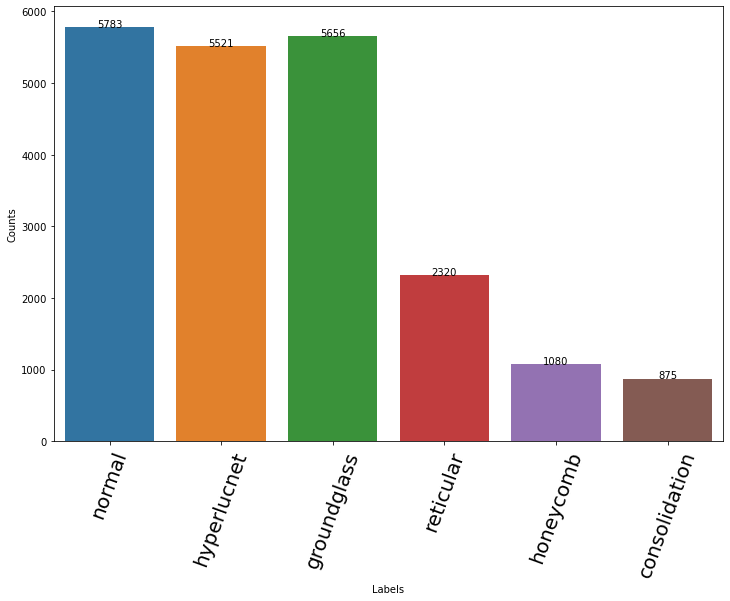

In [5]:
out_test_fname = 'test-2D-6cls-10'
out_test_ffname = os.path.join(out_path, out_test_fname + '.tfrecords')

test_dataset = load_dataset(out_test_ffname)
print(f'nm of test samples: {count_tfrecord_examples(out_test_ffname)}')
label, counts = np.unique(np.fromiter(test_dataset.map(lambda x, y: y), np.int64), return_counts=True)
counts
plt.figure(figsize=(12,8))
plt.ylabel('Counts')
plt.xlabel('Labels')
labels = ['normal', 'hyperlucnet','groundglass','reticular','honeycomb','consolidation']
classes = {0: 'normal', 
          1: 'hyperlucnet',
          2: 'groundglass',
          3: 'reticular',
          4: 'honeycomb',
          5: 'consolidation'}
bars = sns.barplot(x = labels, y = counts) 
show_values_on_bars(bars)  
plt.xticks(rotation=70, fontsize=20)

# 5 class

In [ ]:
out_train_fname = 'train-2D-5cls-hgrhc'
out_train_ffname = os.path.join(out_path, out_train_fname + '.tfrecords')
train_dataset = load_dataset(out_train_ffname)
print(f'nm of training samples: {count_tfrecord_examples(out_train_ffname)}')
label, counts = np.unique(np.fromiter(train_dataset.map(lambda x, y: y), np.int32), return_counts=True)
plt.figure(figsize=(12,8))
plt.ylabel('Counts')
plt.xlabel('Labels')
labels = ['hyperlucnet','ground glass','reticular','honeycomb','consolidation']
classes = {
    0: 'hyperlucnet',
    1: 'groung glass',
    2: 'reticular',
    4: 'honeycomb',
    5: 'consolidation'}
bars = sns.barplot(x = labels, y = counts) 
show_values_on_bars(bars)  
plt.xticks(rotation=70, fontsize=20)

out_val_fname = 'val-2D-5cls-hgrhc'
out_val_ffname = os.path.join(out_path, out_val_fname + '.tfrecords')
val_dataset = load_dataset(out_val_ffname)
print(f'nm of validation samples: {count_tfrecord_examples(out_val_ffname)}')
label, counts = np.unique(np.fromiter(val_dataset.map(lambda x, y: y), np.int32), return_counts=True)
plt.figure(figsize=(12,8))
plt.ylabel('Counts')
plt.xlabel('Labels')
labels = ['hyperlucnet','ground glass','reticular','honeycomb','consolidation']
classes = {
    0: 'hyperlucnet',
    1: 'groung glass',
    2: 'reticular',
    4: 'honeycomb',
    5: 'consolidation'}
bars = sns.barplot(x = labels, y = counts) 
show_values_on_bars(bars)  
plt.xticks(rotation=70, fontsize=20)

# 2 class

In [ ]:
out_train_fname = 'val-2D-2cls-nh'
out_train_ffname = os.path.join(out_path, out_train_fname + '.tfrecords')
train_dataset = load_dataset(out_train_ffname)
print(f'nm of training samples: {count_tfrecord_examples(out_train_ffname)}')
label, counts = np.unique(np.fromiter(train_dataset.map(lambda x, y: y), np.int32), return_counts=True)
plt.figure(figsize=(12,8))
plt.ylabel('Counts')
plt.xlabel('Labels')
labels = ['normal', 'hyperlucnet']
classes = {1: 'normal', 
          2: 'hyperlucnet',
          }
bars = sns.barplot(x = labels, y = counts) 
show_values_on_bars(bars)  
plt.xticks(rotation=70, fontsize=20)